/var/folders/ws/h5k3vlgs0h7_d8nnqfv0yc6c0000gn/T/ipykernel_24425/1433622794.py:98: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  ani.save(animation_path, writer='pillow', fps=20)
/var/folders/ws/h5k3vlgs0h7_d8nnqfv0yc6c0000gn/T/ipykernel_24425/1433622794.py:98: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  ani.save(animation_path, writer='pillow', fps=20)
/var/folders/ws/h5k3vlgs0h7_d8nnqfv0yc6c0000gn/T/ipykernel_24425/1433622794.py:98: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from font(s) DejaVu Sans.
  ani.save(animation_path, writer='pillow', fps=20)
/var/folders/ws/h5k3vlgs0h7_d8nnqfv0yc6c0000gn/T/ipykernel_24425/1433622794.py:98: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from font(s) DejaVu Sans.
  ani.save(animation_path, writer='pillow', fps=20)
/var/folders/ws/h5k3vlgs0h7_d8nnqfv0yc6c0000gn/T/ipykernel_24425/1433622794.py:98: UserWarni

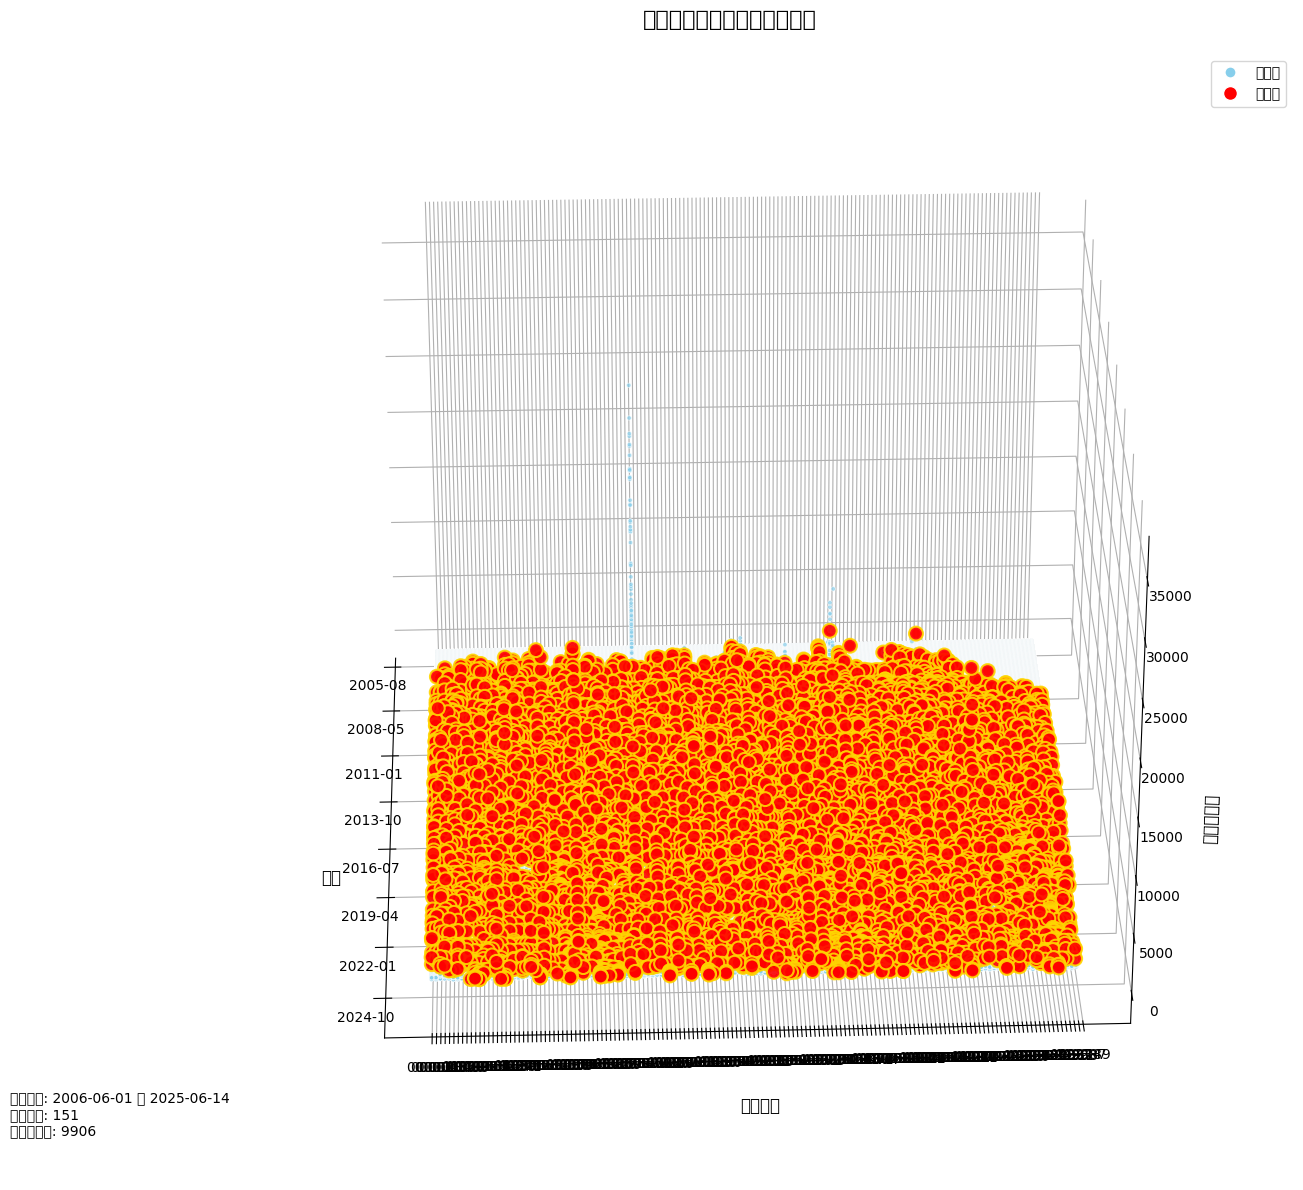

三维旋转动画已保存至: /Users/liboyang/Desktop/内幕交易情感分析/百度指数内容/百度指数异常检测三维动画.gif


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# 读取异常检测结果
file_path = "/Users/liboyang/Desktop/内幕交易情感分析/百度指数内容/百度指数异常检测完整结果_按StockID.xlsx"
df_result = pd.read_excel(file_path, dtype={'Stock_id': str})
df_result['Date'] = pd.to_datetime(df_result['Date'])

# 创建三维图表
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# 设置颜色映射 - 根据异常分数
colors = np.where(df_result['is_anomaly'], 'red', 'skyblue')
sizes = np.where(df_result['is_anomaly'], 50, 10)  # 异常点更大

# 将日期转换为数值用于3D轴
dates_numeric = mdates.date2num(df_result['Date'])

# 将股票ID映射为数值
stock_ids = df_result['Stock_id'].unique()
stock_id_map = {stock_id: i for i, stock_id in enumerate(stock_ids)}
df_result['Stock_id_num'] = df_result['Stock_id'].map(stock_id_map)

# 绘制所有数据点
scatter = ax.scatter(
    dates_numeric,
    df_result['Stock_id_num'],
    df_result['Index'],
    c=colors,
    s=sizes,
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)

# 添加异常点标记
anomaly_df = df_result[df_result['is_anomaly']]
if not anomaly_df.empty:
    anomaly_dates = mdates.date2num(anomaly_df['Date'])
    ax.scatter(
        anomaly_dates,
        anomaly_df['Stock_id_num'],
        anomaly_df['Index'],
        c='red',
        s=100,
        edgecolors='gold',
        linewidths=1.5,
        alpha=0.9,
        label='异常点'
    )

# 设置轴标签和标题
ax.set_xlabel('时间', fontsize=12, labelpad=15)
ax.set_ylabel('股票代码', fontsize=12, labelpad=15)
ax.set_zlabel('百度指数值', fontsize=12, labelpad=15)
ax.set_title('百度指数异常检测三维可视化', fontsize=16, pad=20)

# 设置日期格式
date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_format)

# 设置股票ID刻度
ax.set_yticks(range(len(stock_ids)))
ax.set_yticklabels(stock_ids)

# 添加网格和背景
ax.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# 添加图例
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=8, label='正常点'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='异常点')
]
ax.legend(handles=legend_elements, loc='upper right')

# 创建旋转动画函数
def rotate(angle):
    ax.view_init(elev=30, azim=angle)
    return fig,

# 生成旋转动画
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=50)

# 保存动画
animation_path = "/Users/liboyang/Desktop/内幕交易情感分析/百度指数内容/百度指数异常检测三维动画.gif"
ani.save(animation_path, writer='pillow', fps=20)

# 添加说明文本
fig.text(0.05, 0.05, 
         f"数据范围: {df_result['Date'].min().strftime('%Y-%m-%d')} 至 {df_result['Date'].max().strftime('%Y-%m-%d')}\n"
         f"股票数量: {len(stock_ids)}\n"
         f"异常点数量: {len(anomaly_df)}",
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"三维旋转动画已保存至: {animation_path}")